## Mount google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Check GPU version 

In [23]:
!nvidia-smi

Wed Dec  1 07:05:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    58W / 149W |    271MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1771: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


## Import Required Library

In [57]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

## Resize the images

In [27]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Test'
valid_path = '/content/drive/MyDrive/Train'

## Importing VGG16 Library 

In [28]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [29]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Train*')

## Flatten layers

In [58]:
# our layers 
x = Flatten()(vgg16.output)

In [31]:
len(folders)

1

## Setting the parameters 

In [40]:
prediction = Dense(3, activation='softmax')(x)

## Creating The Model

In [41]:
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

## Summary Of The Model

In [42]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [43]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [44]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [45]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 609 images belonging to 3 classes.


In [46]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 32 images belonging to 3 classes.


## Prepare a model for transfer learning

In [47]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
20/20 [==============================] - 148s 7s/step - loss: 0.7211 - accuracy: 0.6929 - val_loss: 0.5011 - val_accuracy: 0.7500
Epoch 2/20
20/20 [==============================] - 10s 510ms/step - loss: 0.3348 - accuracy: 0.8309 - val_loss: 0.4909 - val_accuracy: 0.8125
Epoch 3/20
20/20 [==============================] - 10s 508ms/step - loss: 0.3317 - accuracy: 0.8506 - val_loss: 0.4194 - val_accuracy: 0.8438
Epoch 4/20
20/20 [==============================] - 10s 506ms/step - loss: 0.2628 - accuracy: 0.8752 - val_loss: 0.4920 - val_accuracy: 0.8125
Epoch 5/20
20/20 [==============================] - 10s 511ms/step - loss: 0.2065 - accuracy: 0.9048 - val_loss: 0.3600 - val_accuracy: 0.8125
Epoch 6/20
20/20 [==============================] - 10s 509ms/step - loss: 0.2097 - accuracy: 0.9097 - val_loss: 0.2763 - val_accuracy: 0.8750
Epoch 7/20
20/20 [==============================] - 10s 507ms/step - loss: 0.1561 - accuracy: 0.9343 - val_loss: 0.8258 - val_accuracy: 0.7188
E

## Plot the loss and accuracy

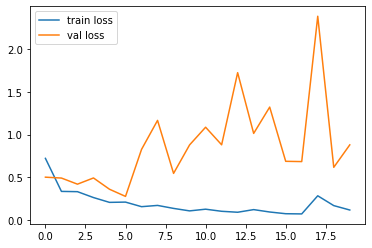

In [48]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

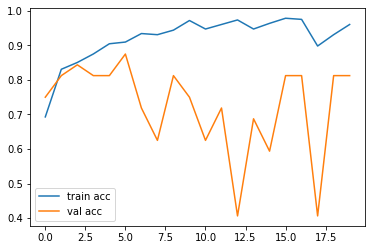

In [49]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


## Saving the model 

In [50]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('Image Detection.h5')

## Predict the test data

In [51]:
y_pred = model.predict(test_set)
y_pred

array([[9.62337792e-01, 1.25719479e-08, 3.76622267e-02],
       [8.32910299e-01, 2.31694024e-08, 1.67089656e-01],
       [9.41165090e-01, 5.85639775e-02, 2.70935445e-04],
       [8.82835150e-01, 2.65595013e-08, 1.17164865e-01],
       [7.59783667e-03, 3.46463391e-09, 9.92402196e-01],
       [9.74140108e-01, 9.45493284e-09, 2.58598458e-02],
       [9.99436557e-01, 3.51996721e-09, 5.63401612e-04],
       [9.70305920e-01, 1.59798474e-09, 2.96940990e-02],
       [7.59783667e-03, 3.46463391e-09, 9.92402196e-01],
       [9.99989867e-01, 7.65719044e-09, 1.01453925e-05],
       [3.69414128e-03, 9.89958823e-01, 6.34702668e-03],
       [9.00069892e-01, 8.47312731e-06, 9.99216288e-02],
       [9.90652919e-01, 1.37058747e-08, 9.34706815e-03],
       [9.98936355e-01, 4.42982855e-05, 1.01933000e-03],
       [7.07710087e-01, 5.29949418e-08, 2.92289793e-01],
       [6.75877392e-01, 2.69146181e-08, 3.24122578e-01],
       [9.99936342e-01, 9.27983385e-11, 6.37029661e-05],
       [2.89993286e-02, 2.22970

## Predict the output from the model

In [55]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# load and prepare the image
# load the image
model = load_model('Image Detection.h5')
img = load_img('/content/drive/MyDrive/Test/Jeans/Jeans (1).jpg', target_size = (224, 224))

# convert to array
img = img_to_array(img)

# reshape into a single sample with 3 channels
img = img.reshape(1, 224, 224, 3)

# center pixel data
img = img.astype('float32')
img = img - [123.68, 116.779, 103.939]

In [56]:
result = model.predict(img)
print(result[0])

[1. 0. 0.]
